## Part 1: The Ideal Case

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import quad

In [2]:
G = 6.6743e-11 # m^3/kg*s^2
M_earth = 5.972e24 #kg
R_earth = 6378.1*1000 # m
g = 9.81 #m/s^2

accel = G*M_earth/R_earth**2
alpha_1 = 0 # ignoring drag
vo = 0 # m/s 
delta_x = 4000 # m 
t = np.sqrt(2*delta_x/accel)
print(f'time to bottom = {t} in s')

time to bottom = 28.57416552900485 in s


2. Simplifying the diffential

$\frac{d^2y}{dt^2} = -g - \alpha(\frac{dy}{dt})^\gamma$

$v = \frac{dy}{dt}$

$\frac{dv}{dt} = -g - \alpha(v)^\gamma$

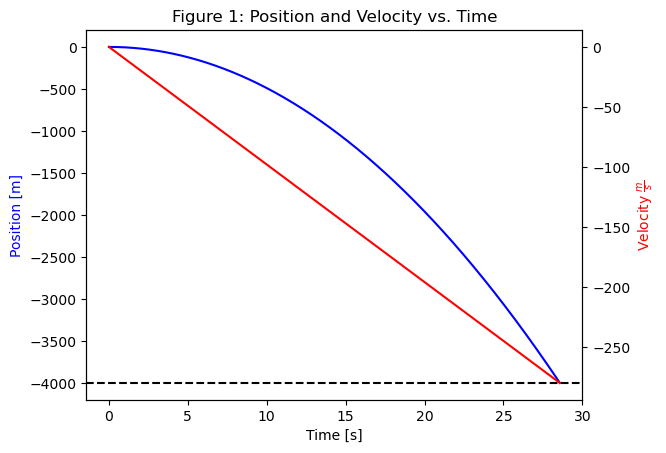

In [3]:
# 3. Determining the fall time in the ideal case: no drag, constant gravity 
def derivatives(t,s):
    y = s[0]
    v = s[1]
    dydt = v  
    dv2dt = -accel
    return np.array([dydt, dv2dt])

t0, tf = (0, t)
t_eval = np.linspace(0, t, 1000)

y0 = (0,0)

soln = solve_ivp( fun = derivatives, t_span = (0,t), y0 = y0, t_eval = t_eval)
time = soln.t 
position = soln.y[0]
velocity = soln.y[1]

fig, ax = plt.subplots()
ax.plot(time, position, label = 'Position', color = 'blue')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Position [m]', color = 'blue')
ax2 = ax.twinx()
ax2.plot(time, velocity, label = 'Velocity', color = 'red')
ax2.set_ylabel('Velocity $\\frac{m}{s}$', color = 'red')
ax2.set_title('Figure 1: Position and Velocity vs. Time')
ax.axhline(-4000, color = 'black', ls = 'dashed')
fig.savefig('Figure 1.png')

Figure 1: Plot of Position and Velocity vs. Time 

In [4]:
# 4. Determining when the test mass reaches the bottom in the ideal case 
# bottom returns when the function returns zero for the first time 
def bottom(t,s):
    return s[0] + 4000

soln = solve_ivp(fun = derivatives, t_span = (0,30), y0 = y0, t_eval = t_eval, events = bottom)
print(soln)

event = [soln.t_events[0][0], soln.y_events[0][0][0]]

time_bottom = event[0] 
print(f'time to bottom = {time_bottom} in seconds')

comparison = t/time_bottom
print(comparison)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.860e-02 ...  2.855e+01  2.857e+01]
        y: [[ 0.000e+00 -4.008e-03 ... -3.992e+03 -4.000e+03]
            [ 0.000e+00 -2.803e-01 ... -2.797e+02 -2.800e+02]]
      sol: None
 t_events: [array([ 2.857e+01])]
 y_events: [array([[-4.000e+03, -2.800e+02]])]
     nfev: 44
     njev: 0
      nlu: 0
time to bottom = 28.574165529004848 in seconds
1.0000000000000002


4) Compare this to your analytic
calculation and discuss any differences you might see.

The analytical calculation I found was 28.57416552900485 seconds and the time calculated using events detection was 28.574165529004848 seconds which is almost exactly the same with a difference in the 14th decimal place. 

## PART 2: INCLUDING DRAG AND A VARIABLE 

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.860e-02 ...  2.855e+01  2.857e+01]
        y: [[ 0.000e+00 -4.008e-03 ... -3.992e+03 -4.000e+03]
            [ 0.000e+00 -2.803e-01 ... -2.796e+02 -2.799e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 44
     njev: 0
      nlu: 0


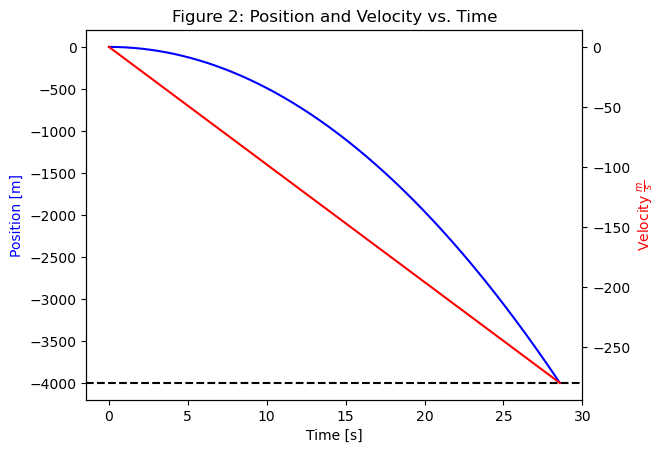

In [5]:
# Finding when the object reaches the bottom including drag and a variable g 

def new_derivatives(t,s):
    y = s[0]
    v = s[1]
    r = s[0] + R_earth
    dydt = v  
    dv2dt = -accel*(r/R_earth)
    return np.array([dydt, dv2dt])

t0, tf = (0, t)
t_eval = np.linspace(0, t, 1000)

y0 = (0,0)
soln2 = solve_ivp(fun = new_derivatives, t_span = (0,t), y0 = y0, t_eval = t_eval)
print(soln2)

time_w_hd = soln2.t
position_w_hd = soln2.y[0]
velocity_w_hd = soln2.y[1]

fig, ax = plt.subplots()
ax.plot(time_w_hd, position_w_hd, label = 'Position', color = 'blue')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Position [m]', color = 'blue')
ax2 = ax.twinx()
ax2.plot(time_w_hd, velocity_w_hd, label = 'Velocity', color = 'red')
ax2.set_ylabel('Velocity $\\frac{m}{s}$', color = 'red')
ax2.set_title('Figure 2: Position and Velocity vs. Time')
ax.axhline(-4000, color = 'black', ls = 'dashed')
fig.savefig('Figure 2.png')

In [6]:
# finding when the object hits the bottom 

def bottom(t,s):
    return s[0] + 4000

soln2_bottom = solve_ivp(fun = new_derivatives, t_span = (0,30), y0 = y0, t_eval = t_eval, events = bottom)
print(soln2_bottom)

bottom_hd = [soln2_bottom.t_events[0][0], soln2_bottom.y_events[0][0][0]]

time_bottom_w_hd = bottom_hd[0]
print(time_bottom_w_hd)

print(f'time to bottom = {time_bottom_w_hd} in seconds')

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.860e-02 ...  2.855e+01  2.857e+01]
        y: [[ 0.000e+00 -4.008e-03 ... -3.992e+03 -4.000e+03]
            [ 0.000e+00 -2.803e-01 ... -2.796e+02 -2.799e+02]]
      sol: None
 t_events: [array([ 2.858e+01])]
 y_events: [array([[-4.000e+03, -2.799e+02]])]
     nfev: 44
     njev: 0
      nlu: 0
28.575659086738423
time to bottom = 28.575659086738423 in seconds


2. What effect does incorporating a height-dependent g have on the fall time? Explain.

Incorporating a height-dependent g produces a fall time of 28.575659086738423 seconds. A non-height dependent g produces a fall time of 28.574165529004848 seconds. Incorporating a height makes it take slightly longer to fall due to the fact that the gravitational constant depends directly on the distance from the center of the Earth (r). As r decreases, g decreases because there is less mass interior to the object. Essentially, less mass is pulling on the object.

In [7]:
gamma = 2
v_terminal = 50 # m/s
alpha = accel/np.abs(v_terminal)**gamma
print(f'alpha = {alpha}')

# calibrating alpha 

def derivatives_w_alpha(t,s):
    y = s[0]
    v = s[1]
    r = s[0] + R_earth
    dydt = v  
    dv2dt = -accel*(r/R_earth) + alpha*np.abs(v)**gamma
    return np.array([dydt, dv2dt])

alpha = 0.003919249086741722


3. I calibrated the value of alpha by taking the equation $\frac{d^2y}{dt^2} = -g + \alpha\times|(\frac{dy}{dt})|^\gamma$ and plugging in what we know. We can assume at some point, this object is going to reach a terminal velocity so $\frac{d^2y}{dt^2} = 0$. We assume the terminal velocity it reaches is 50 $\frac{m}{s}$ which can plugged into $\frac{dy}{dt}$. We can then rearrange and solve for alpha. I found alpha to be 0.003919249086741722.

In [8]:
t_eval_3 = np.linspace(0, 100, 1000)


#finding when the object hits the bottom 
def bottom_w_alpha(t,s):
    return s[0] + 4000

y0 = (0,0)
soln3 = solve_ivp(fun = derivatives_w_alpha, t_span = (0, 100), y0 = y0, t_eval = t_eval_3, events = bottom_w_alpha)

bottom_w_alpha = [soln3.t_events[0][0], soln3.y_events[0][0][0]]

time_to_bottom = bottom_w_alpha[0]
print(f'time to bottom w drag = {time_to_bottom} in seconds')

time_w_alpha = soln3.t
position_w_alpha = soln3.y[0]
velocity_w_alpha = soln3.y[1]

comparison_ft = time_to_bottom/time_bottom_w_hd
print(comparison_ft)

time to bottom w drag = 83.54624949346243 in seconds
2.9236858278532276


3. What affect does including drag have on the fall time?

Including drag in our situation increases the fall time by about 2.92 times what it was when drag was not included. 

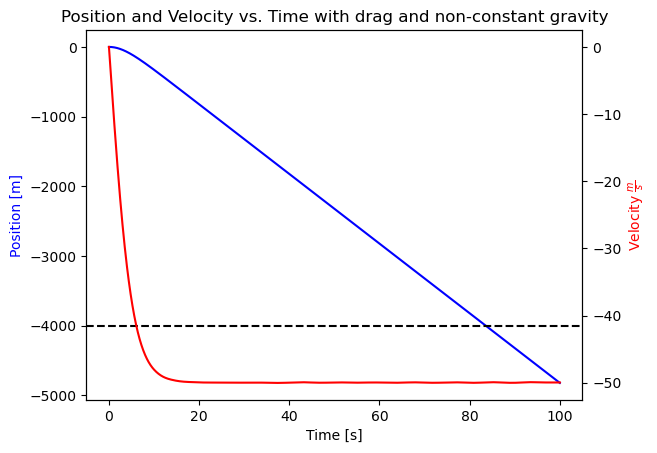

In [9]:
fig, ax = plt.subplots()
ax.plot(time_w_alpha, position_w_alpha, label = 'Position', color = 'blue')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Position [m]', color = 'blue')
ax2 = ax.twinx()
ax2.plot(time_w_alpha, velocity_w_alpha, label = 'Velocity', color = 'red')
ax2.set_ylabel('Velocity $\\frac{m}{s}$', color = 'red')
ax2.set_title('Position and Velocity vs. Time with drag and non-constant gravity')
ax.axhline(-4000, color = 'black', ls = 'dashed')
fig.savefig('Pos and vel vs time with drag and non-constant g.png')

## Part 3: The Coriolis Force

In [10]:
m_object = 1 # kg
earth_rot_rate = 7.272e-5 # rad/s
#now including the coriolis force
def derivatives_w_coriolis(t,s):
    x = s[0] # x pos
    y = s[1] # y pos (depth)
    z = s[2] # z pos
    vx = s[3] # x vel
    vy = s[4] # y vel
    vz = s[5] # z vel
    r = y + R_earth
    dxdt = vx
    dydt = vy  
    dzdt = vz
    dvx2dt = 2*earth_rot_rate*vy
    dvy2dt = -accel*(r/R_earth) - 2*earth_rot_rate*vx
    dvz2dt = 0 
    return np.array([dxdt, dydt, dzdt, dvx2dt, dvy2dt, dvz2dt])

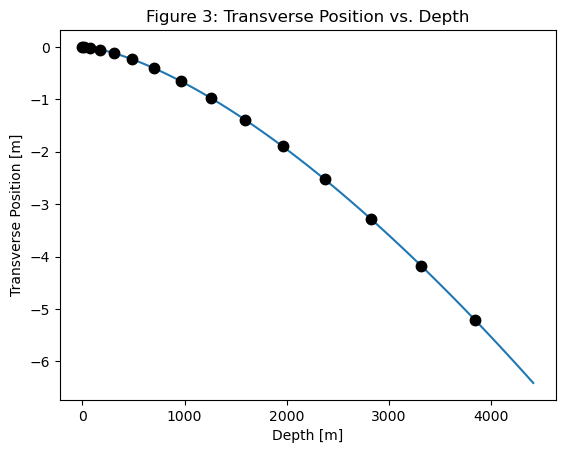

In [11]:
t0, tf = 0, 30
t_eval_4 = np.linspace(0,30,100)
y0 = [0, 0,0,0,0,0]

soln4 = solve_ivp(fun = derivatives_w_coriolis, t_span = (0, 30), y0 = y0, t_eval = t_eval_4)
transverse_position = soln4.y[0]
depth = soln4.y[1]

two_sec_int = np.arange(0,30,2)

soln_dot = solve_ivp(fun = derivatives_w_coriolis, t_span = (0, 30), y0 = y0, t_eval = two_sec_int)
dot_transverse_position = soln_dot.y[0]
dot_depth = soln_dot.y[1]

fig, ax = plt.subplots()
ax.plot(-depth, transverse_position)
ax.plot(-dot_depth, dot_transverse_position, marker = '.', ls = '', markersize = 15, color = 'black')
ax.set_ylabel('Transverse Position [m]')
ax.set_xlabel('Depth [m]')
ax.set_title('Figure 3: Transverse Position vs. Depth')
fig.savefig('Figure 3.png')

In [12]:
def bottom(t,s):
    return s[1] + 4000

soln4_bottom = solve_ivp(fun = derivatives_w_coriolis, t_span = (0, 30), y0 = y0, t_eval = t_eval_4, events = bottom)
bottom = [soln4_bottom.t_events[0][0], soln4_bottom.y_events[0][0][0]]
print(f'Hits the bottom = {bottom[0]} in seconds')

def side(t,s):
    return s[0] + 2.5

soln4_side = solve_ivp(fun = derivatives_w_coriolis, t_span = (0, 30), y0 = y0, t_eval = t_eval_4, events = side)
print(soln4_side)
side = [soln4_side.t_events[0][0], soln4_side.y_events[0][0][0]]
print(f'Hits the side = {side[0]} in seconds')
print(f'Height it hits side = {soln4_side.y_events[0][0][1]} in meters')

Hits the bottom = 28.575679655117924 in seconds
  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.030e-01 ...  2.970e+01  3.000e+01]
        y: [[ 0.000e+00 -6.609e-06 ... -6.220e+00 -6.412e+00]
            [ 0.000e+00 -4.499e-01 ... -4.320e+03 -4.409e+03]
            ...
            [ 0.000e+00 -2.969e+00 ... -2.909e+02 -2.939e+02]
            [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]]
      sol: None
 t_events: [array([ 2.192e+01])]
 y_events: [array([[-2.500e+00, -2.353e+03,  0.000e+00, -3.422e-01,
                   -2.147e+02,  0.000e+00]])]
     nfev: 44
     njev: 0
      nlu: 0
Hits the side = 21.915951302851653 in seconds
Height it hits side = -2352.9162033330313 in meters


3. If the mine shaft is 5m wide, and you drop the test mass from the center, does the test mass reach the bottom? Or does it bump into the wall first?

If the mine shaft is 5 meters wide and the test mass is dropped from the center, the test mass bumps the wall before it reaches the bottom.

In [13]:
# TURNING DRAG BACK ON
def derivatives_w_coriolis(t,s):
    x = s[0] # x pos
    y = s[1] # y pos (depth)
    z = s[2] # z pos
    vx = s[3] # x vel
    vy = s[4] # y vel
    vz = s[5] # z vel
    r = y + R_earth
    dxdt = vx
    dydt = vy  
    dzdt = vz
    dvx2dt = 2*earth_rot_rate*vy
    dvy2dt = -accel*(r/R_earth) + alpha*np.abs(vy)**gamma - 2*earth_rot_rate*vx
    dvz2dt = 0 
    return np.array([dxdt, dydt, dzdt, dvx2dt, dvy2dt, dvz2dt])

Hits the bottom = 83.54851603721757 in seconds
  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0  2 ... 96 98]
        y: [[ 0.000e+00 -1.871e-03 ... -3.112e+01 -3.248e+01]
            [ 0.000e+00 -1.912e+01 ... -4.623e+03 -4.723e+03]
            ...
            [ 0.000e+00 -1.865e+01 ... -4.992e+01 -4.995e+01]
            [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]]
      sol: None
 t_events: [array([ 2.959e+01])]
 y_events: [array([[-2.500e+00, -1.303e+03,  0.000e+00, -1.894e-01,
                   -5.002e+01,  0.000e+00]])]
     nfev: 140
     njev: 0
      nlu: 0
side = 29.586691646850767 in seconds
0.003919249086741722


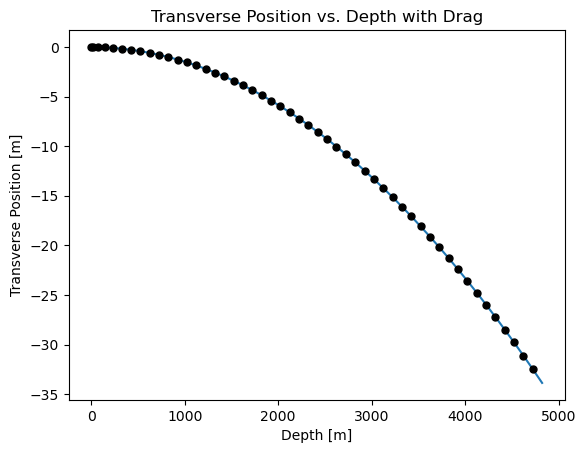

In [14]:
soln4_w_drag = solve_ivp(fun = derivatives_w_coriolis, t_span = (0, 100), y0 = y0, t_eval = t_eval_3)
transverse_position = soln4_w_drag.y[0]
depth = soln4_w_drag.y[1]

two_sec_int = np.arange(0,100,2)

def bottom(t,s):
    return s[1] + 4000

def side(t,s):
    return s[0] + 2.5

soln_dot = solve_ivp(fun = derivatives_w_coriolis, t_span = (0, 100), y0 = y0, t_eval = two_sec_int, events = bottom)
dot_transverse_position = soln_dot.y[0]
dot_depth = soln_dot.y[1] 
bottom = [soln_dot.t_events[0][0], soln_dot.y_events[0][0][0]]
print(f'Hits the bottom = {bottom[0]} in seconds')

soln_dot_2 = solve_ivp(fun = derivatives_w_coriolis, t_span = (0, 100), y0 = y0, t_eval = two_sec_int, events = side)
print(soln_dot_2)
dot_transverse_position_2 = soln_dot_2.y[0]
dot_depth_2 = soln_dot_2.y[1] 
side = [soln_dot_2.t_events[0][0], soln_dot_2.y_events[0][0][0]]
print(f'side = {side[0]} in seconds')


print(alpha)

fig, ax = plt.subplots()
ax.plot(-depth, transverse_position)
ax.plot(-dot_depth, dot_transverse_position, marker = '.', ls = '', markersize = 10, color = 'black')
ax.set_ylabel('Transverse Position [m]')
ax.set_xlabel('Depth [m]')
ax.set_title('Transverse Position vs. Depth with Drag')
fig.savefig('Transverse position vs. Depth with drag.png')

4. Now turn drag back on. Does drag make any difference here?

Turning drag back on makes the object take longer to fall down which can be seen by the dots. The dots show the position of the object every two seconds and this plot shows them occurring much more frequently than the previous plot, meaning less distance is traveled every two seconds. It also shows that the object will hit the wall (8 seconds later seconds) at a later time but at an earlier height (~1303 meters). It will take longer to reach the bottom of the shaft as well (about 83 seconds).

# Part 4: An Infinitely Deep Mine

In [15]:
# no coriolis force
# no drag
# earth is constant density 

def derivatives(t,s):
    x = s[0] # x pos
    y = s[1] # y pos (depth)
    z = s[2] # z pos
    vx = s[3] # x vel
    vy = s[4] # y vel
    vz = s[5] # z vel
    r = y + R_earth
    dxdt = vx
    dydt = vy  
    dzdt = vz
    dvx2dt = 0
    dvy2dt = -accel*(r/R_earth) 
    dvz2dt = 0 
    return np.array([dxdt, dydt, dzdt, dvx2dt, dvy2dt, dvz2dt])

t0, tf = 0, 10000
t_eval = np.linspace(0,tf,1000)
y0 = [0,0,0,0,0,0]

soln = solve_ivp(fun = derivatives, t_span = (t0, tf), y0 = y0, t_eval = t_eval)
transverse_position = soln.y[0]
depth = soln.y[1]
velocity = soln.y[4]

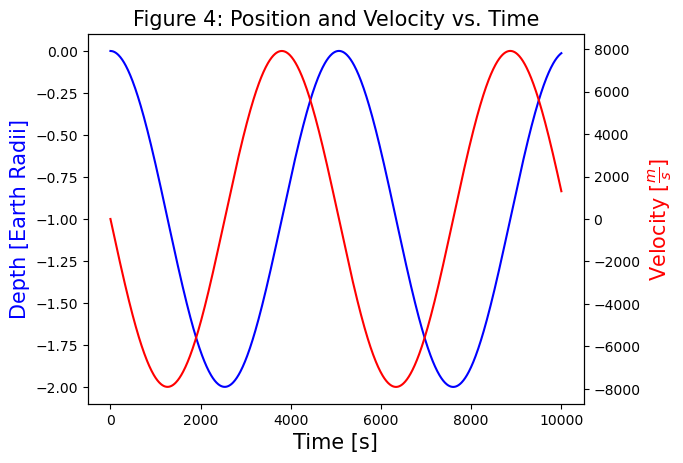

In [16]:
fig, ax = plt.subplots()
ax.plot(t_eval, depth/R_earth, color = 'blue')
ax.set_xlabel('Time [s]', fontsize = 15)
ax.set_ylabel('Depth [Earth Radii]', color = 'blue', fontsize = 15)
ax2 = ax.twinx()
ax2.plot(t_eval, velocity, color = 'red')
ax2.set_ylabel('Velocity [$\\frac{m}{s}$]', fontsize = 15, color = 'red')
ax.set_title('Figure 4: Position and Velocity vs. Time', fontsize = 15)
fig.savefig('Figure 4.png')

1. Comment on what you see in the graph.

Position and velocity are out of phase with one another. Also, you can see the object oscillates back and forth from each side of the Earth, moving up and down as time goes on. 

In [17]:
# finding when the object crosses the center of the earth and when it reaches the other side

def center_event(t,s):
   return s[1] + R_earth

soln = solve_ivp(fun = derivatives, t_span = (t0, tf), y0 = y0, t_eval = t_eval, events = center_event)
event = [soln.t_events[0][0], soln.y_events[0][0][4]]
print(f'time to the center of Earth = {event[0]} in seconds')
print(f'speed of object to the center of the earth {event[1]} in m/s')

def other_side(t,s):
    return s[1] + 2*R_earth*0.999

soln2 = solve_ivp(fun = derivatives, t_span = (t0, tf), y0 = y0, t_eval = t_eval, events = other_side, rtol = 1e-10, atol = 1e-12)
other_side_event = [soln2.t_events[0][0], soln.y_events[0][0][0]]
print(f'time to the other side of Earth = {other_side_event[0]} in seconds')

time to the center of Earth = 1267.3065619550155 in seconds
speed of object to the center of the earth -7908.756435680398 in m/s
time to the other side of Earth = 2483.6496010024143 in seconds


In [18]:
#comparing the crossing time to the orbital period

v_circ = np.sqrt(G*M_earth/R_earth)

orbital_period = 2*np.pi*R_earth/v_circ
print(f'Oribital period {orbital_period} in seconds')
comparison = orbital_period/other_side_event[0]
print(f'ratio of orbital period to crossing time {comparison}')

Oribital period 5069.371199675785 in seconds
ratio of orbital period to crossing time 2.0410975838257372


3. The orbital period is about two times that of the crossing time.

# Part 5: A Non-Uniform Earth

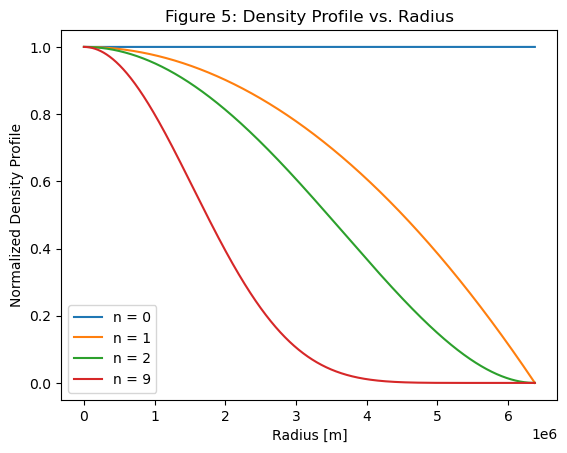

In [19]:
# no drag
r = np.linspace(0, R_earth, 10000)
n = np.array([0, 1, 2, 9])

# finding density, assuming the normalization constant is 1
def density(r, n):
        return 1*(1 - r**2/R_earth**2)**n

fig, ax = plt.subplots()

for i in range(len(n)):
    density_profile = density(r, n[i])
    ax.plot(r, density_profile, label = f'n = {n[i]}')

ax.set_title('Figure 5: Density Profile vs. Radius')
ax.set_xlabel('Radius [m]')
ax.set_ylabel('Normalized Density Profile')
ax.legend()
fig.savefig('Figure 5.png')

In [20]:
# USE GRAVITATIONAL ACCELERATION
r = np.linspace(0, R_earth, 10000)
n_values = [0, 1, 2, 9]

# the integral used to find the mass 
def integrand(r,n):
    return 4*np.pi*((1 - (r**2/R_earth**2))**n) * r**2

def rho(r,n):
    constant, err = quad(integrand, 0, R_earth, args = (n,))
    rho_n = M_earth/constant # finding the normalization constant 
    return rho_n*(1 - (r**2/R_earth**2))**n

def mass_int(r,n):
    return 4*np.pi*rho(r,n)*r**2

def force_func(r, n):
    M, err2 = quad(mass_int, 0, r, args = (n,))
    return  G*M/r**2

C:\Users\mlmoh\AppData\Local\Temp\ipykernel_20352\3345251234.py:19: RuntimeWarning: invalid value encountered in scalar divide
  return  G*M/r**2


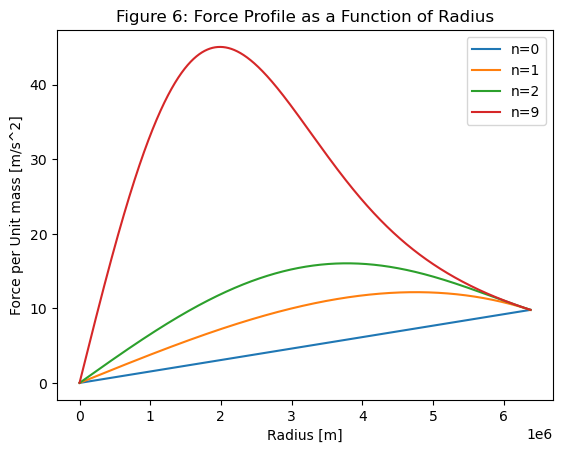

In [21]:
fig, ax = plt.subplots()
force = np.zeros(10000)
# plotting for each n 
for i in range(len(n)):
    for j in range(len(r)):
        force[j] = force_func(r[j], n[i])
    ax.plot(r, force, label = f'n={n[i]}')

ax.legend()
ax.set_xlabel('Radius [m]')
ax.set_ylabel('Force per Unit mass [m/s^2]')
ax.set_title('Figure 6: Force Profile as a Function of Radius')
fig.savefig('Figure 6.png')

In [22]:
n_values = [0, 1, 2, 9]
# finding the time the object reaches the center and the speed for each n
def derivatives_0(t,s):
    y = s[0]
    v = s[1]
    dydt = v  
    dv2dt = -force_func(y, n_values[0])
    return np.array([dydt, dv2dt])

for i in range(len(n)):
    acceleration_0 = np.zeros(10000)
    for j in range(len(r)):
        acceleration_0[j] = force_func(r[j], n[i])

t0, tf = (0, 10000)
t_eval = np.linspace(t0, tf, 1000)

y0 = (R_earth,0)

soln = solve_ivp(fun = derivatives_0, t_span = (t0,tf), y0 = y0, t_eval = t_eval)
print(soln)

time_0 = soln.t
position_0 = soln.y[0]
velocity_0 = soln.y[1]

C:\Users\mlmoh\AppData\Local\Temp\ipykernel_20352\3345251234.py:19: RuntimeWarning: invalid value encountered in scalar divide
  return  G*M/r**2


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.001e+01 ...  9.990e+03  1.000e+04]
        y: [[ 6.378e+06  6.378e+06 ...  6.273e+06  6.287e+06]
            [ 0.000e+00 -9.808e+01 ...  1.422e+03  1.325e+03]]
      sol: None
 t_events: None
 y_events: None
     nfev: 128
     njev: 0
      nlu: 0


In [23]:
def derivatives_1(t,s):
    y = s[0]
    v = s[1]
    dydt = v  
    dv2dt = -force_func(y, n_values[1])
    return np.array([dydt, dv2dt])

for i in range(len(n)):
    acceleration_1 = np.zeros(10000)
    for j in range(len(r)):
        acceleration_1[j] = force_func(r[j], n[i])

t0, tf = (0, 10000)
t_eval = np.linspace(t0, tf, 1000)

y0 = (R_earth,0)

soln1 = solve_ivp(fun = derivatives_1, t_span = (t0,tf), y0 = y0, t_eval = t_eval)
print(soln1)

time_1 = soln1.t
position_1 = soln1.y[0]
velocity_1 = soln1.y[1]

C:\Users\mlmoh\AppData\Local\Temp\ipykernel_20352\3345251234.py:19: RuntimeWarning: invalid value encountered in scalar divide
  return  G*M/r**2


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.001e+01 ...  9.990e+03  1.000e+04]
        y: [[ 6.378e+06  6.378e+06 ... -1.937e+06 -2.034e+06]
            [ 0.000e+00 -9.808e+01 ... -9.725e+03 -9.653e+03]]
      sol: None
 t_events: None
 y_events: None
     nfev: 200
     njev: 0
      nlu: 0


In [24]:
def derivatives_2(t,s):
    y = s[0]
    v = s[1]
    dydt = v  
    dv2dt = -force_func(y, n_values[2])
    return np.array([dydt, dv2dt])

for i in range(len(n)):
    acceleration_2 = np.zeros(10000)
    for j in range(len(r)):
        acceleration_2[j] = force_func(r[j], n[i])

t0, tf = (0, 10000)
t_eval = np.linspace(t0, tf, 1000)

y0 = (R_earth,0)

soln2 = solve_ivp(fun = derivatives_2, t_span = (t0,tf), y0 = y0, t_eval = t_eval)
print(soln2)

time_2 = soln2.t
position_2 = soln2.y[0]
velocity_2 = soln2.y[1]

C:\Users\mlmoh\AppData\Local\Temp\ipykernel_20352\3345251234.py:19: RuntimeWarning: invalid value encountered in scalar divide
  return  G*M/r**2


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.001e+01 ...  9.990e+03  1.000e+04]
        y: [[ 6.378e+06  6.378e+06 ... -5.614e+06 -5.656e+06]
            [ 0.000e+00 -9.808e+01 ... -4.244e+03 -4.121e+03]]
      sol: None
 t_events: None
 y_events: None
     nfev: 254
     njev: 0
      nlu: 0


In [25]:
def derivatives_3(t,s):
    y = s[0]
    v = s[1]
    dydt = v  
    dv2dt = -force_func(y, n_values[3])
    return np.array([dydt, dv2dt])

for i in range(len(n)):
    acceleration_3 = np.zeros(10000)
    for j in range(len(r)):
        acceleration_3[j] = force_func(r[j], n[i])

t0, tf = (0, 10000)
t_eval = np.linspace(t0, tf, 1000)

y0 = (R_earth,0)

soln3 = solve_ivp(fun = derivatives_3, t_span = (t0,tf), y0 = y0, t_eval = t_eval)
print(soln3)

time_3 = soln3.t
position_3 = soln3.y[0]
velocity_3 = soln3.y[1]

C:\Users\mlmoh\AppData\Local\Temp\ipykernel_20352\3345251234.py:19: RuntimeWarning: invalid value encountered in scalar divide
  return  G*M/r**2


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.001e+01 ...  9.990e+03  1.000e+04]
        y: [[ 6.378e+06  6.378e+06 ... -3.953e+06 -3.865e+06]
            [ 0.000e+00 -9.808e+01 ...  8.595e+03  8.850e+03]]
      sol: None
 t_events: None
 y_events: None
     nfev: 356
     njev: 0
      nlu: 0


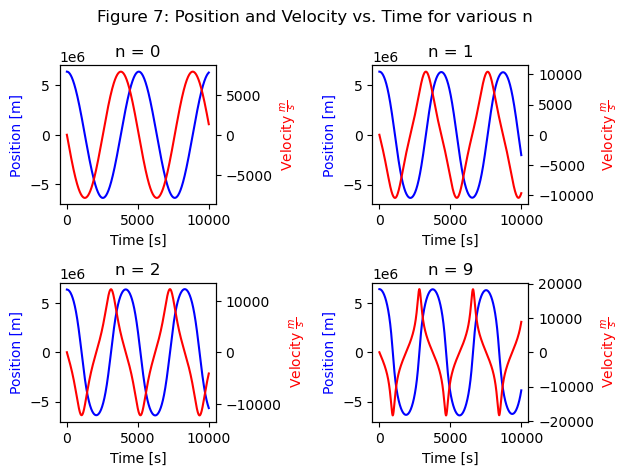

In [26]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(time_0, position_0, label = 'Position', color = 'blue')
ax[0,0].set_xlabel('Time [s]')
ax[0,0].set_ylabel('Position [m]', color = 'blue')
ax[0,0].set_title('n = 0')
ax2 = ax[0,0].twinx()
ax2.plot(time_0, velocity_0, label = 'Velocity', color = 'red')
ax2.set_ylabel('Velocity $\\frac{m}{s}$', color = 'red')
fig.tight_layout()

ax[0,1].plot(time_1, position_1, label = 'Position', color = 'blue')
ax[0,1].set_xlabel('Time [s]')
ax[0,1].set_ylabel('Position [m]', color = 'blue')
ax[0,1].set_title('n = 1')
ax2 = ax[0,1].twinx()
ax2.plot(time_1, velocity_1, label = 'Velocity', color = 'red')
ax2.set_ylabel('Velocity $\\frac{m}{s}$', color = 'red')
fig.tight_layout()

ax[1,0].plot(time_2, position_2, label = 'Position', color = 'blue')
ax[1,0].set_xlabel('Time [s]')
ax[1,0].set_ylabel('Position [m]', color = 'blue')
ax[1,0].set_title('n = 2')
ax2 = ax[1,0].twinx()
ax2.plot(time_2, velocity_2, label = 'Velocity', color = 'red')
ax2.set_ylabel('Velocity $\\frac{m}{s}$', color = 'red')
fig.tight_layout()

ax[1,1].plot(time_3, position_3, label = 'Position', color = 'blue')
ax[1,1].set_xlabel('Time [s]')
ax[1,1].set_ylabel('Position [m]', color = 'blue')
ax[1,1].set_title('n = 9')
ax2 = ax[1,1].twinx()
ax2.plot(time_3, velocity_3, label = 'Velocity', color = 'red')
ax2.set_ylabel('Velocity $\\frac{m}{s}$', color = 'red')

fig.suptitle('Figure 7: Position and Velocity vs. Time for various n')
fig.tight_layout()
fig.savefig('Figure 7.png')

In [27]:
# 4. 
def center_event(t,s):
   return s[0]

soln = solve_ivp(fun = derivatives_0, t_span = (t0, tf), y0 = y0, t_eval = t_eval, events = center_event, rtol = 1e-10, atol = 1e-12)
event = [soln.t_events[0][0], soln.y_events[0][0][1]]
print(f'time to the center of Earth (n = 0) = {event[0]} in seconds')
print(f'speed of object to the center of the earth (n = 0) = {event[1]} in m/s')

soln1 = solve_ivp(fun = derivatives_1, t_span = (t0, tf), y0 = y0, t_eval = t_eval, events = center_event, rtol = 1e-10, atol = 1e-12)
event1 = [soln1.t_events[0][0], soln1.y_events[0][0][1]]
print(f'time to the center of Earth (n = 1) = {event1[0]} in seconds')
print(f'speed of object to the center of the earth (n = 1) = {event1[1]} in m/s')

soln2 = solve_ivp(fun = derivatives_2, t_span = (t0, tf), y0 = y0, t_eval = t_eval, events = center_event, rtol = 1e-10, atol = 1e-12)
event2 = [soln2.t_events[0][0], soln2.y_events[0][0][1]]
print(f'time to the center of Earth (n = 2) = {event2[0]} in seconds')
print(f'speed of object to the center of the earth (n = 2) = {event2[1]} in m/s')

soln3 = solve_ivp(fun = derivatives_3, t_span = (t0, tf), y0 = y0, t_eval = t_eval, events = center_event, rtol = 1e-10, atol = 1e-12)
event3 = [soln3.t_events[0][0], soln3.y_events[0][0][1]]
print(f'time to the center of Earth (n = 9) = {event3[0]} in seconds')
print(f'speed of object to the center of the earth (n = 9) = {event3[1]} in m/s')


time to the center of Earth (n = 0) = 1267.342799917932 in seconds
speed of object to the center of the earth (n = 0) = -7905.277129744224 in m/s
time to the center of Earth (n = 1) = 1096.5129862740437 in seconds
speed of object to the center of the earth (n = 1) = -10457.69866519816 in m/s
time to the center of Earth (n = 2) = 1035.0756471805566 in seconds
speed of object to the center of the earth (n = 2) = -12182.850259076939 in m/s
time to the center of Earth (n = 9) = 943.7775313381497 in seconds
speed of object to the center of the earth (n = 9) = -18370.673770391506 in m/s


# Part 6: A Lunar Mine Shaft

In [28]:
M_moon = 7.35e22 # kg
R_moon = 1738.1*1000 # m 
accel_moon = G*M_moon/R_moon**2

def derivatives(t,s):
    y = s[0] 
    v = s[1] 
    dydt = v
    dvy2dt = -accel_moon*(y/R_moon) 
    return np.array([dydt, dvy2dt])

t0, tf = 0, 10000
t_eval = np.linspace(0,tf,500)
y0 = [R_moon,0]

soln = solve_ivp(fun = derivatives, t_span = (t0, tf), y0 = y0, t_eval = t_eval)
print(soln)

def center_event(t,s):
  return s[0] 

soln = solve_ivp(fun = derivatives, t_span = (t0, tf), y0 = y0, t_eval = t_eval, events = center_event)
event = [soln.t_events[0][0], soln.y_events[0][0][0]]
print(f'time to the center of Moon = {event[0]} in seconds')

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.004e+01 ...  9.980e+03  1.000e+04]
        y: [[ 1.738e+06  1.738e+06 ... -1.694e+06 -1.687e+06]
            [ 0.000e+00 -3.254e+01 ...  3.734e+02  4.050e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 104
     njev: 0
      nlu: 0
time to the center of Moon = 1624.9059919736467 in seconds


In [29]:
earth_density = M_earth/((4/3)*np.pi*R_earth**3)
moon_density = M_moon/((4/3)*np.pi*R_moon**3)

density_ratio = moon_density/earth_density
print(f'density ratio of moon to earth = {density_ratio}')

density ratio of moon to earth = 0.6081591337511927


The dependency of fall time on density: 

$a = \frac{d^2y}{dt^2} = -g_0\frac{r}{R}$ 

where r is equal to y.

Because of the negative in front of g, we know that this is has a oscillating solution as the second derivative changes signs. 

$r(t) = Acos(\omega t)+ Bsin(\omega t)$ 

A = $ Y_0$,
B = $V_0$ 

We know this because when t is zero, you should just have the initial position and the sine term would drop away whereas the cosine term would just go to one, showing that A is the initial position and B is the initial velocity.

where $ \omega = \sqrt\frac{g_0}{R}$

Given the initial conditions, $V_0 = 0$ and $r(t) = 0$, 

we know $\omega t = \sqrt\frac{g_0}{R} t = \frac{\pi}{2}$

solving for t, $ t = \sqrt\frac{\pi^2 R}{4g_0}$

we can then solve for $g_0$ as we know it is equal to $\frac{GM}{R^2}$ where we use M = $\frac{4}{3} \rho \pi R^3$

$g_0 = G\frac{4 \rho \pi R^3}{R^2}$

And then plugging that into t:

$t = \sqrt\frac{ 3\pi}{16G \rho}$

In [30]:
t_analytic_moon = np.sqrt(3*np.pi/(16*G*moon_density))
print(t_analytic_moon)

t_analytic_earth = np.sqrt(3*np.pi/(16*G*earth_density))
print(t_analytic_earth)

ratio = 1267.3065619550155/t_analytic_earth
print(ratio)

1625.1201867414668
1267.342799918946
0.9999714063440982


The analytical time I found for the Earth is essentially the same as what I found in part 4 with differences in the hundreds place. The ratio between the two is 0.99, which is basically the same thing.